# Implementation of kNN classifier from scratch

## Imports

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

## Data Analysis

In [76]:
df = sns.load_dataset('iris')

In [77]:
df.head().style.background_gradient(sns.color_palette("YlOrBr", as_cmap=True))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.200000,setosa
1,4.900000,3.000000,1.400000,0.200000,setosa
2,4.700000,3.200000,1.300000,0.200000,setosa
3,4.600000,3.100000,1.500000,0.200000,setosa
4,5.000000,3.600000,1.400000,0.200000,setosa


In [78]:
X = df.iloc[:,:4]
y = df.species

In [79]:
fig = px.pie(df, 'species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '],title='Data Distribution',template='plotly_dark')

fig.show()

## From this plot we conclude that:
- The Data is perfectly balanced

In [80]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Sepal Length

In [81]:
fig = px.box(data_frame=df, x='species',y='sepal_length',color='species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')

fig.show()

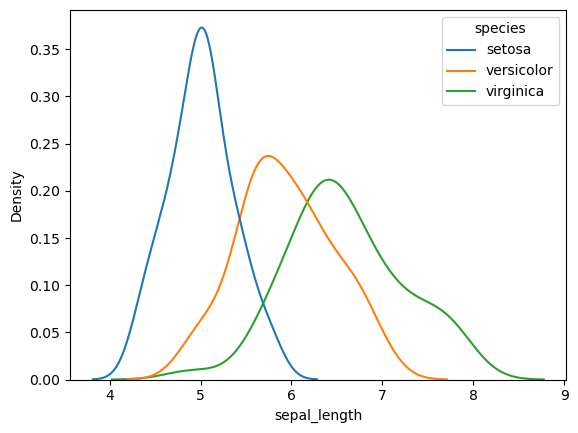

In [82]:
sns.kdeplot(data=df,x='sepal_length',hue='species')
plt.show()

# From these plots we conclude that:
- Setosa has much smaller SepalLength than the other 2 classes

- Virginca has the highest SepalLength, however It seems hard to distingush between Virginca and    Versicolor using SepalLength as the difference is less clear

- We can see that Virginica contains an outlier

## SepalWidth

In [83]:
fig = px.box(data_frame=df, x='species',y='sepal_width',color='species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')

fig.show()

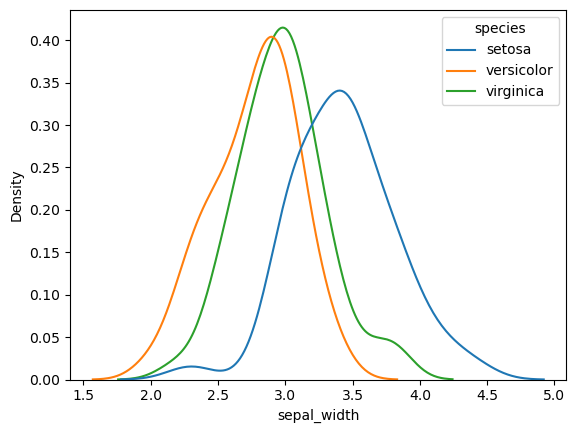

In [84]:
sns.kdeplot(data=df,x='sepal_width',hue='species')
plt.show()

## From these plots we conclude that:
- Setosa has larger SepalWidth than the other 2 classes

- Versicolo has smaller SepalWidth than the other 2 classes

- Overall all classes seem to have relatively close value of sepalwidth which indicate that is might not be a very useful feature

# Petal-Length

In [85]:
fig = px.box(data_frame=df, x='species',y='petal_length',color='species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')

fig.show()

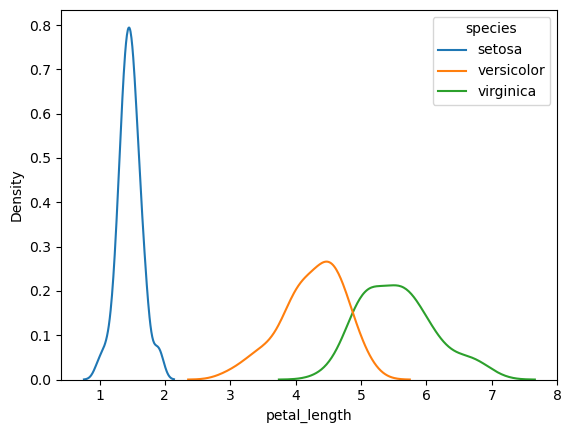

In [86]:
sns.kdeplot(data=df,x='petal_length',hue='species')
plt.show()

In [87]:
fig = px.box(data_frame=df, x='species',y='petal_width',color='species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')

fig.show()

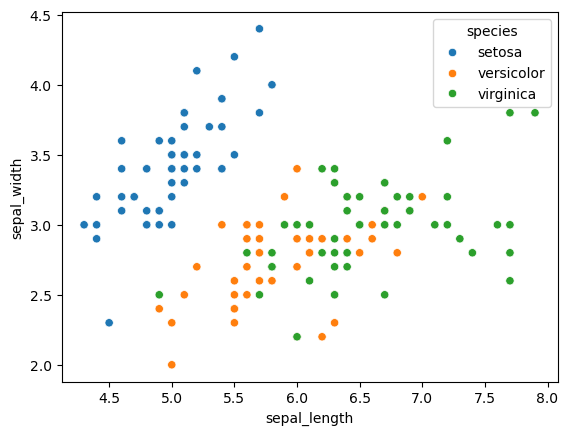

In [88]:
sns.scatterplot(data=df,x='sepal_length', y='sepal_width',hue='species')
plt.show()

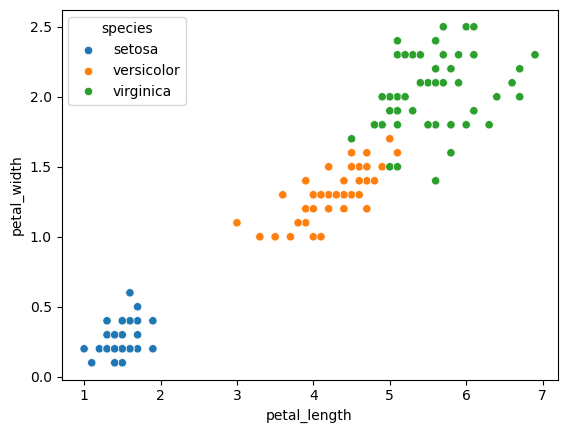

In [89]:
sns.scatterplot(data=df,x='petal_length', y='petal_width',hue='species')
plt.show()

# Sklearn Implementation

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [91]:
train_error = []
test_error = []
for i in range(1,31): # Let us vary k from 1 to 31
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)

    y_pred1 = knn.predict(X_train)
    train_error.append(np.sum(y_pred1 != y_train)) # np.sum() -> counts and adds total inequalities

    y_pred2 = knn.predict(X_test)
    test_error.append(np.sum(y_pred2 != y_test))

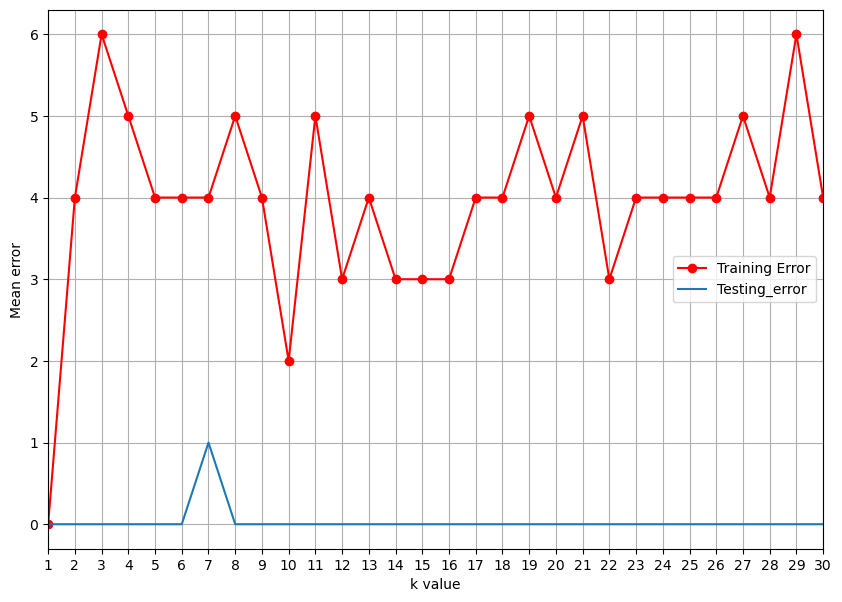

In [92]:
from cProfile import label
plt.figure(figsize=(10,7))

plt.plot(range(1,31),np.array(train_error)+np.array(test_error), 'r-o' ,label = 'Training Error')
plt.plot(range(1,31),test_error, label = 'Testing_error')
plt.xlabel('k value')
plt.ylabel('Mean error')
plt.xticks(range(0,31))
plt.xlim(1,30)
plt.grid(True)
plt.legend()
plt.show()

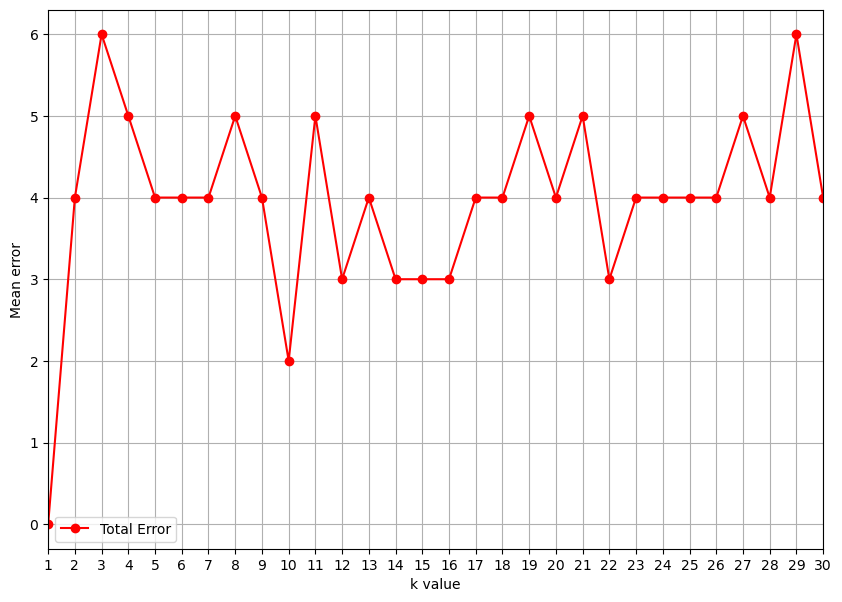

In [93]:
from cProfile import label
plt.figure(figsize=(10,7))

plt.plot(range(1,31),np.array(train_error)+np.array(test_error), 'r-o' ,label = 'Total Error')
plt.xlabel('k value')
plt.ylabel('Mean error')
plt.xticks(range(0,31))
plt.xlim(1,30)
plt.grid(True)
plt.legend()
plt.show()

# We find that :
- for k = 10  we get best results
- let us verify that
- we only hv training dataset error for k=10

In [108]:
knn = KNeighborsClassifier(n_neighbors=10,weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [109]:
knn.score(X_train,y_train)

1.0

In [96]:
knn.score(X_test,y_test)

1.0

In [97]:
y_pred = knn.predict(X_train)

In [98]:
y_train[y_train != y_pred] 

83     versicolor
106     virginica
Name: species, dtype: object

In [99]:
y_pred[y_train != y_pred]

array(['virginica', 'versicolor'], dtype=object)

In [100]:
np.sum(y_pred != y_train) # k=10 it gives us only 2 missclassifications

np.int64(2)

# Evaluation 
- Let's convert both into numpy arrays
- and evalute performance metrics

In [101]:
from numpy import dtype


y_train = y_train.to_numpy(dtype=object)

In [102]:
from sklearn.metrics import recall_score


print(f'precision = {precision_score(y_train,y_pred,average='macro')*100:.2f}%' )
print(f'recall = {recall_score(y_train,y_pred,average='macro')*100:.2f}%' )

precision = 98.33%
recall = 98.33%


In [103]:
mat = confusion_matrix(y_pred, y_train)

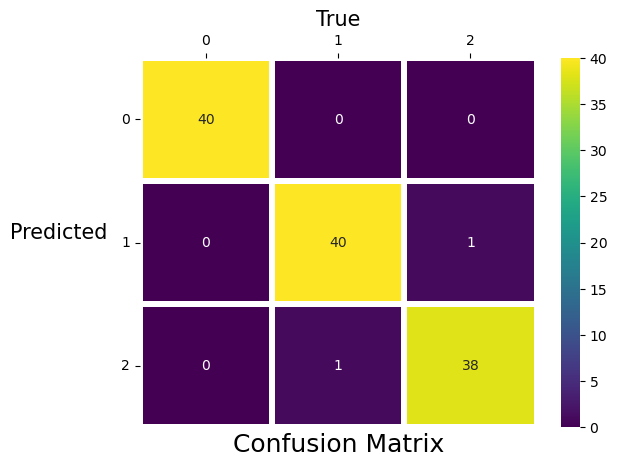

In [104]:
fig , ax = plt.subplots() # fig & axis level control 
sns.heatmap(mat , annot=True , cmap='viridis',linewidth=3)
plt.xlabel('Confusion Matrix',fontsize=18)
ax.xaxis.tick_top()
plt.ylabel('Predicted' , fontsize=15,rotation=0,labelpad=45)
plt.title('True', fontsize=15)
plt.yticks(rotation=0)
plt.show()

In [105]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.98      0.98      0.98        41
   virginica       0.97      0.97      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [106]:
clf = classification_report(y_train,y_pred,output_dict=True)

<Axes: >

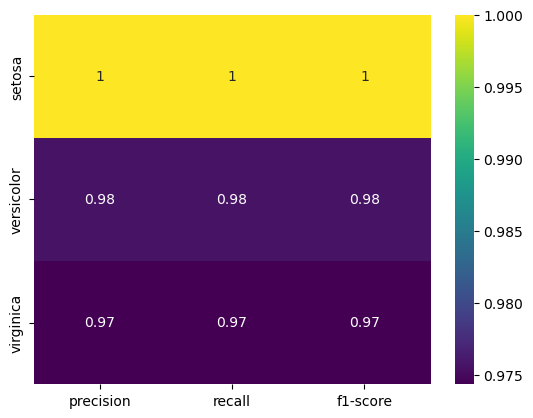

In [107]:
newdf = pd.DataFrame(clf).T
sns.heatmap(newdf.iloc[:3,:3] ,annot=True , cmap='viridis')

## Conclusions 
- our Model predicts with almost 98% accuracy on training data
- and performs 100% on testing data set